<a href="https://colab.research.google.com/github/arianab68/COVID-19_Analysis/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID 19 Data Analysis

Description: Ingest data from the latest New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 30 days' worth of data for the selected county. Perform EDA and show your findings through different plots and visualization techniques. 

Task 1 : Environment Set up

Task 2 : Data Collection

Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Task4: Understand NY Covid 19 data in last 30 days

Task5: Comparing Covid 19 data with different states

Task6: Conclusion



Collaborated with: MJ and Tashi.

Task 1: Environment Setup

In [ ]:
#Importing the necessary libraries for this analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Task 2: Data Collection

In [ ]:
#Collecting the COVID-19 Dataset.

data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

Task 3: Data Wrangling and EDA

In [ ]:
#Getting a basic idea of what is included within the dataset.

data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
#Expanding the dataset preview to 20 columns.

data.head(20)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [ ]:
#Extracting the null or unknown values within the 'fips' column by using the value counts function.

data[data['fips'].isna()]['county'].value_counts()

Unknown          7962
New York City     324
Kansas City       305
Joplin            208
Name: county, dtype: int64

In [ ]:
#Dropping the 'fips' column because it is not needed in our analysis.

data = data.drop(['fips', ],axis=1)

In [ ]:
#Getting a view of the data without the 'fips' column.

data.head()

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [ ]:
#Getting the generalized information about the dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943233 entries, 0 to 943232
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    943233 non-null  object 
 1   county  943233 non-null  object 
 2   state   943233 non-null  object 
 3   cases   943233 non-null  int64  
 4   deaths  923068 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 36.0+ MB


In [ ]:
#Getting the sum of all the null values.

data.isna().sum()

date          0
county        0
state         0
cases         0
deaths    20165
dtype: int64

In [ ]:
#Getting the count of the values within the 'deaths' column.

data['deaths'].value_counts()

0.0       240126
1.0        91494
2.0        56442
3.0        39260
4.0        31373
           ...  
2928.0         1
3426.0         1
3427.0         1
5977.0         1
4390.0         1
Name: deaths, Length: 3658, dtype: int64

In [ ]:
#Extracting a generalized description of the dataset.

data.describe()

,cases,deaths
count,9.432330e+05,923068.000000
mean,2.256154e+03,57.562226
std,1.185291e+04,462.654322
min,0.000000e+00,0.000000
25%,4.100000e+01,0.000000
50%,2.690000e+02,5.000000
75%,1.161000e+03,25.000000
max,1.024592e+06,26104.000000


Text(0.5, 0, 'deaths')

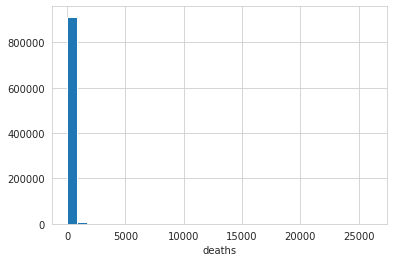

In [ ]:
#Creating a seaborn histogram to get a visual picture of the values within the 'deaths' column.

sns.set_style('whitegrid')
data['deaths'].hist(bins=30)
plt.xlabel('deaths')

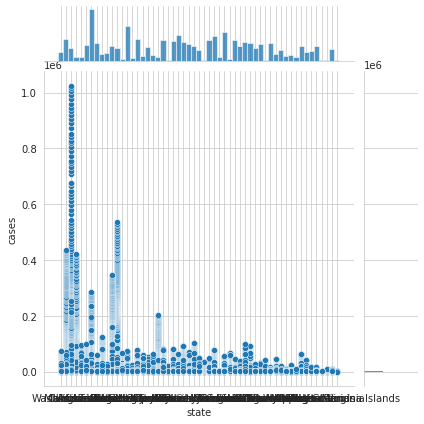

In [ ]:
#Creating a seaborn jointplot to compare the number of cases for each state.

sns.jointplot(x='state',y='cases', data=data)

Task 4: Understand NY Covid 19 data in last 30 days

In [ ]:
#Obtaining the data 

data = pd.read_csv('http://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col='date', parse_dates=True)

In [ ]:
#Creating a variable 'bool_mask' to filer New York as the state and New York City as the county

bool_mask = (data['state'] == 'New York') & (data['county']== 'New York City')
data_ny = data[bool_mask].copy()


In [ ]:
#Filtering the NY data to show the last 30 days

data_ny = data_ny.loc['2020-dec-19':]

In [ ]:
#Getting a view of the New York City county data of COVID-19 cases within the past 30 days.

data_ny.head(30)

,county,state,fips,cases,deaths
date,,,,,
2020-12-19,New York City,New York,NaN,381067,24677.0
2020-12-20,New York City,New York,NaN,383808,24697.0
2020-12-21,New York City,New York,NaN,387595,24735.0
2020-12-22,New York City,New York,NaN,391634,24768.0
2020-12-23,New York City,New York,NaN,395810,24790.0
2020-12-24,New York City,New York,NaN,401251,24842.0
2020-12-25,New York City,New York,NaN,405857,24889.0
2020-12-26,New York City,New York,NaN,410048,24931.0
2020-12-27,New York City,New York,NaN,413472,24973.0


In [ ]:
#Dropping the 'fips' column in the filtered New York dataset.

data_ny = data_ny.drop(['fips', ],axis=1)

In [ ]:
#Getting a view of the New York dataset without the 'fips' column.

data_ny.head(30)

,county,state,cases,deaths
date,,,,
2020-12-19,New York City,New York,381067,24677.0
2020-12-20,New York City,New York,383808,24697.0
2020-12-21,New York City,New York,387595,24735.0
2020-12-22,New York City,New York,391634,24768.0
2020-12-23,New York City,New York,395810,24790.0
2020-12-24,New York City,New York,401251,24842.0
2020-12-25,New York City,New York,405857,24889.0
2020-12-26,New York City,New York,410048,24931.0
2020-12-27,New York City,New York,413472,24973.0


In [ ]:
#Using these formulas to calculate the amount of new cases and new deaths within New York City within the past 30 days.

data_ny['new_cases'] = data_ny['cases'] - data_ny['cases'].shift(1).fillna(0)
data_ny['new_deaths'] = data_ny['deaths'] - data_ny['deaths'].shift(1).fillna(0)
data_ny.head(30)

,county,state,cases,deaths,new_cases,new_deaths
date,,,,,,
2020-12-19,New York City,New York,381067,24677.0,381067.0,24677.0
2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0
2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0
2020-12-22,New York City,New York,391634,24768.0,4039.0,33.0
2020-12-23,New York City,New York,395810,24790.0,4176.0,22.0
2020-12-24,New York City,New York,401251,24842.0,5441.0,52.0
2020-12-25,New York City,New York,405857,24889.0,4606.0,47.0
2020-12-26,New York City,New York,410048,24931.0,4191.0,42.0
2020-12-27,New York City,New York,413472,24973.0,3424.0,42.0


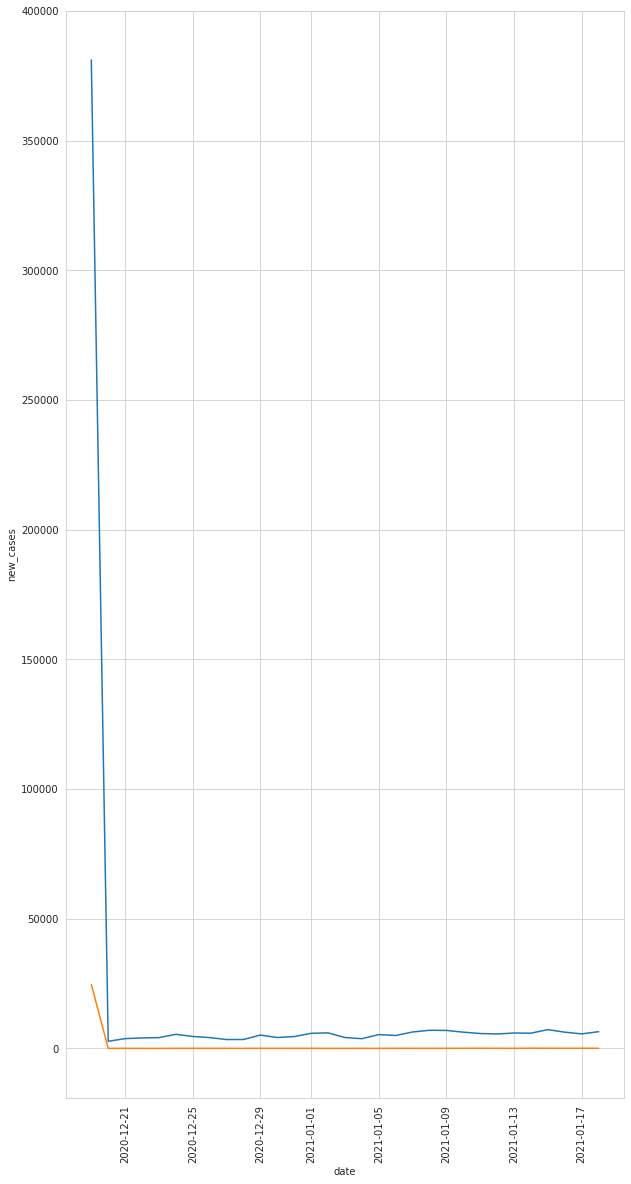

In [ ]:
#Plotting a lingplot showing the amount of new cases each day in New York within the past 30 days.

plt.figure(figsize=(10,20))
sns.lineplot(x = data_ny.index, y = data_ny['new_cases'], err_style=None)
plt.xticks(rotation = 90);

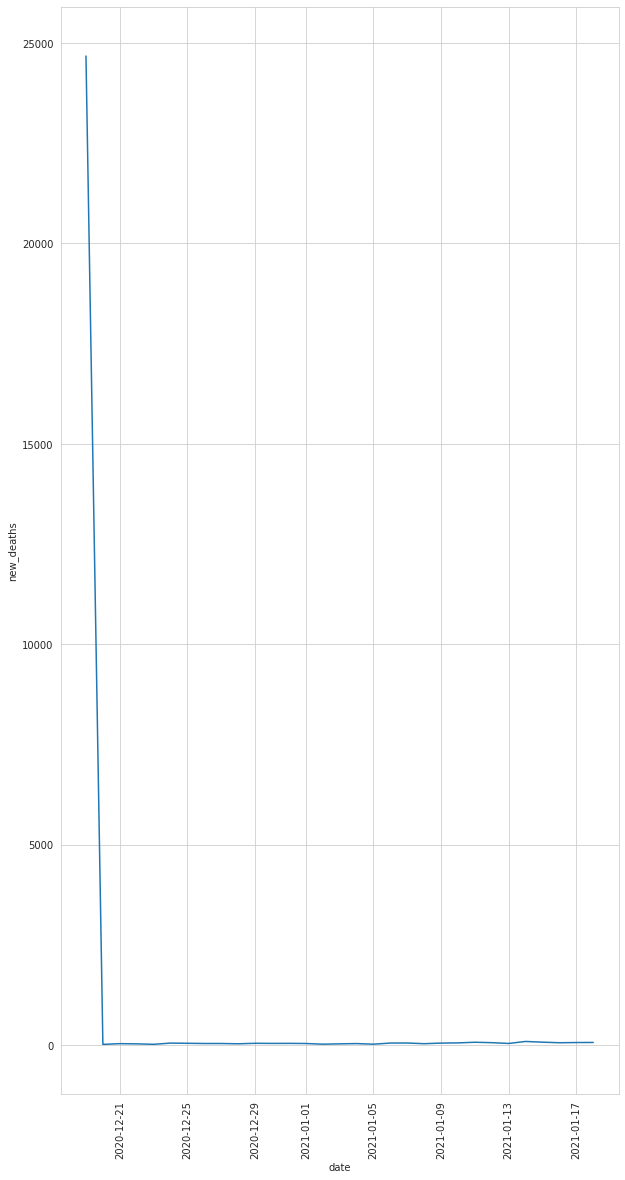

In [ ]:
#Plotting a linplot to show the amount of new deaths each day in New York City within the past 30 days.

plt.figure(figsize=(10,20))
sns.lineplot(x = data_ny.index, y = data_ny['new_deaths'], err_style=None)
plt.xticks(rotation = 90);

Task 5: Comparing Covid 19 data with different states

In [ ]:
#Creating my list of states that I want to look at.

states = ['New York', 'California', 'Texas', 'Florida', 'Chicago']

In [ ]:
#Filtering the data for these states.

bool_filter = (data['state'] == 'New York') | (data['state'] == 'California') | (data['state'] == 'Texas') | (data['state'] == 'Florida') | (data['state'] == 'Chicago')
data = data[bool_filter]

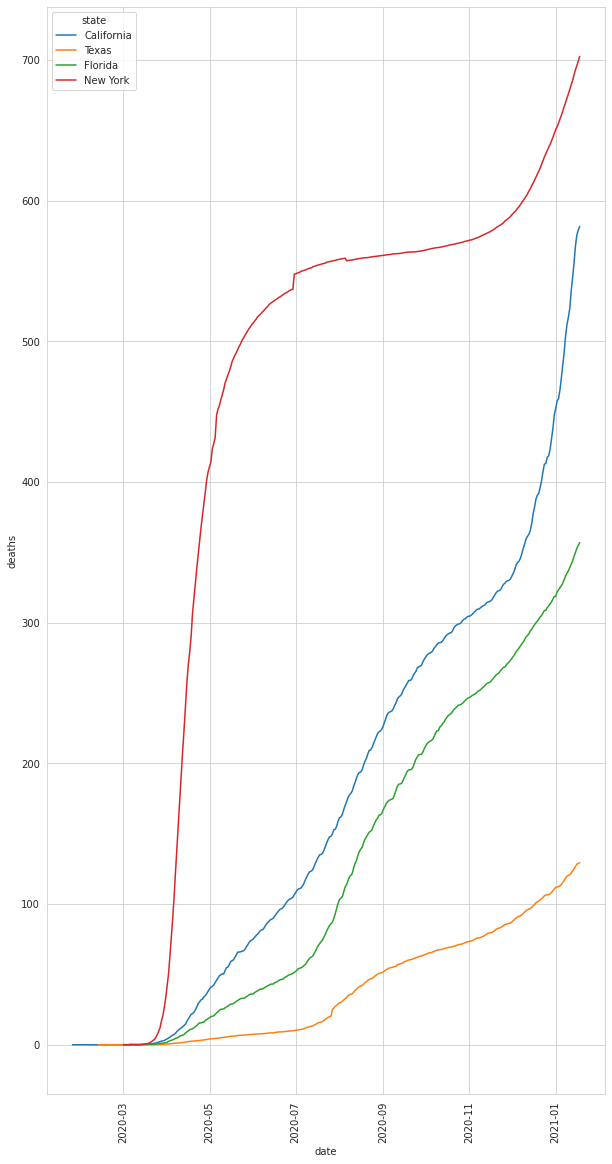

In [ ]:
#Creating a lineplot to visualize the comparison of the amount of deaths within each of these states.

plt.figure(figsize=(10,20))
sns.lineplot(x = data.index, y=data['deaths'], hue = data['state'], err_style=None)
plt.xticks(rotation = 90);

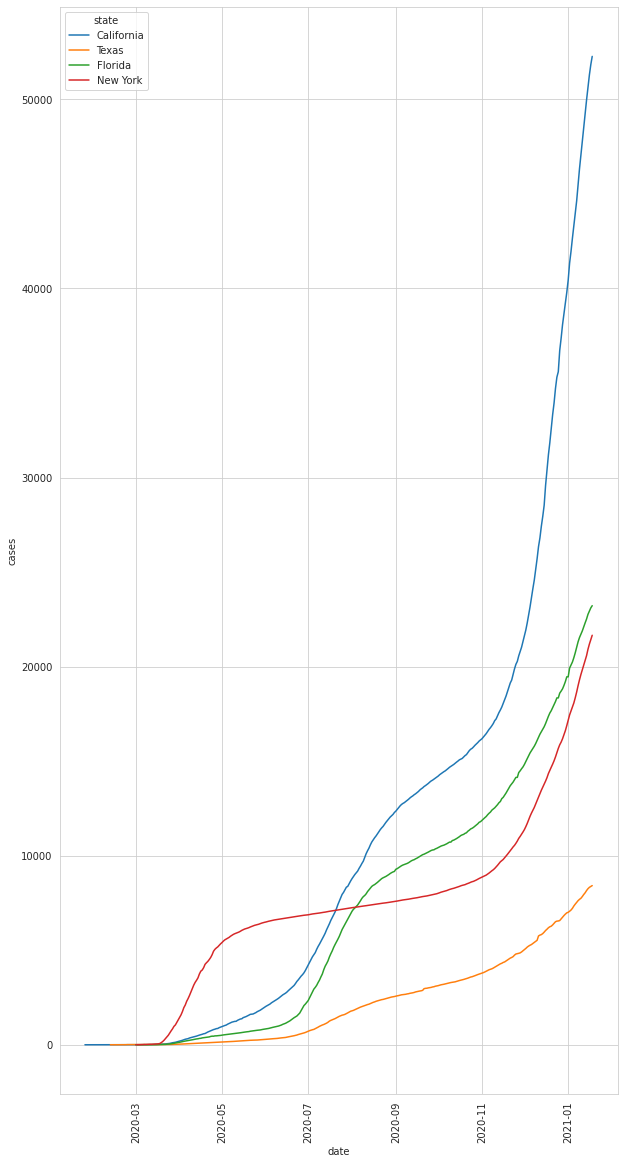

In [ ]:
#Creating a lineplot to visualize the comparison of the amount of cases within each of these states.

plt.figure(figsize=(10,20))
sns.lineplot(x = data.index, y=data['cases'], hue = data['state'], err_style=None)
plt.xticks(rotation = 90);

Task 6: Conclusion


Through analyzing this COVID-19 dataset, something that I can conclude is that by filtering out the states by it's county was extremly helpful in narrowing down our analysis especially considering how large this dataset is.
Furthermore, when analyzing specifically New York City's COVID-19 data, it was alarming and rather eyeopening to visualize the impact that COVID-19 had in NYC, especially in regards to the amount of 'deaths' caused by this virus. 